# EMNIST 辨識

In [1]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D#將'keras.layers.convolutional'改掉
from tensorflow.keras.layers import MaxPooling2D
from keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#顯示:No module named 'keras.layers.convolutional'表示此套件未安裝
#模組更新'tensorflow.keras.layers'

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

### Import and Shape Data

In [100]:
!pip install emnist

## emnist dataset 說明(https://www.nist.gov/itl/products-and-services/emnist-dataset)

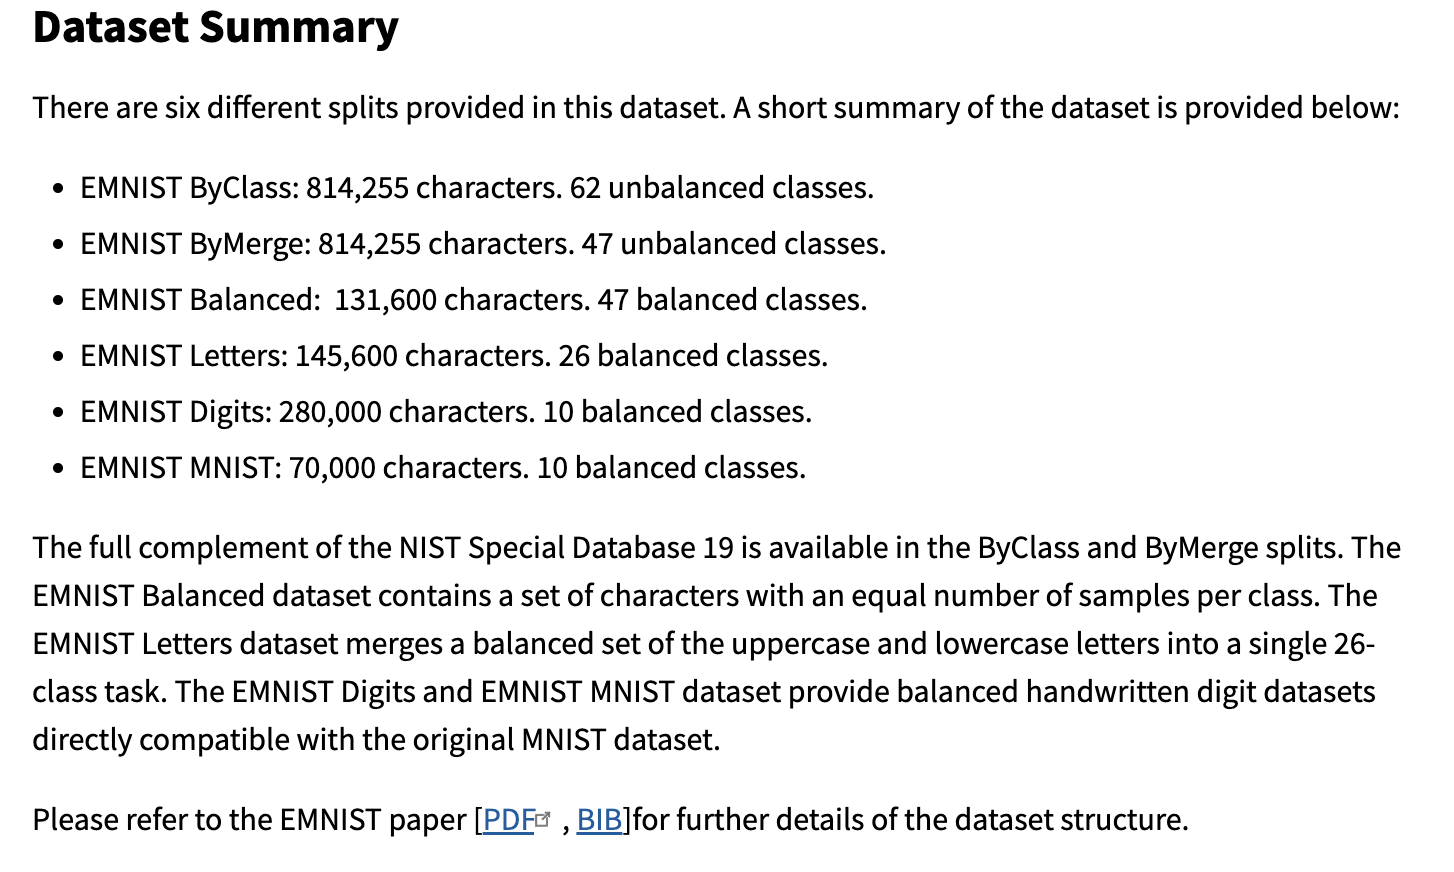

In [2]:
from IPython.display import Image
Image('./emnist_dataset.png', width=600)

In [3]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
# Working with 'letters'只辨識英文字母檔
# Import 
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('letters')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('letters')

In [5]:
# Check shape of training and testing data
print(x_train.shape)#images_train.shape
print(y_train.shape)#labels_train.shape
print(x_test.shape)#images_test.shape
print(y_test.shape)#labels_test.shape

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


In [6]:
#將前5筆叫出來
import pandas as pd

df = pd.DataFrame({'ascii':y_train})
df.head()

,ascii
0,23
1,7
2,16
3,15
4,23


In [145]:
#看有多少值，以及欄位有幾筆
df.ascii.value_counts()
#結果看出索引值最小為1，等一下要做減1的步驟

ascii
23    4800
7     4800
20    4800
3     4800
4     4800
8     4800
1     4800
12    4800
9     4800
25    4800
2     4800
5     4800
19    4800
26    4800
21    4800
18    4800
14    4800
10    4800
24    4800
22    4800
11    4800
13    4800
17    4800
15    4800
16    4800
6     4800
Name: count, dtype: int64

In [7]:
#使用pandas模組unique()確認資料欄位
df.ascii.unique()
#1~26要轉為0~25

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5,  2,
       25,  9, 12,  1,  8,  4,  3, 20,  6], dtype=uint8)

In [8]:
#使用pandas模組nunique()計算欄位總數
df.ascii.nunique()
#26個英文字母(含大小寫)

26

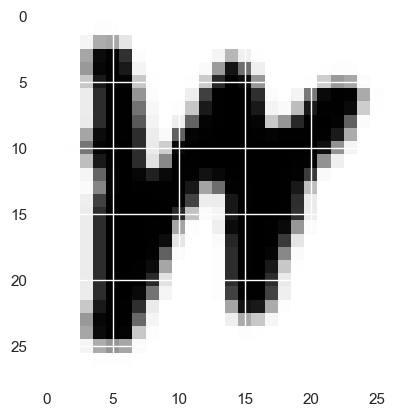

In [10]:
# Plot an image
#印出第1張圖
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:], cmap=plt.cm.Greys);

In [11]:
#顯示第1張圖片的數值
y_train[0]
#結果為23(第23個英文字母)

23

In [12]:
#因23數值較難辨別，可使用'emnist-letters-mapping.txt'檔案作轉換
#emnist-letters-mapping.txt有3欄
#使用匿名函式＋chr()將'ascii' code轉換為英文字母
#apply()為使用每列中＋的每個值lambda x:
import pandas as pd

df = pd.read_csv('emnist-letters-mapping.txt', header=None, sep = ' ', index_col=0)
df.columns = ['ascii', 'ascii2']
df['character'] = df['ascii'].apply(lambda x: chr(x))
df

,ascii,ascii2,character
0,,,
1,65,97,A
2,66,98,B
3,67,99,C
4,68,100,D
5,69,101,E
6,70,102,F
7,71,103,G
8,72,104,H
9,73,105,I


### ASCII Table 說明:
#### Dec欄(10進位)、Hx欄(16進位)、Oct欄(8進位)、Char(字母值)

## [ASCII Table](https://www.asciitable.com/)
<img src='https://www.asciitable.com/asciifull.gif' />

In [13]:
#測試48之結果
chr(48)

'0'

In [14]:
#叫出第0筆，並顯示其'ascii'資訊
y_train[0], df.iloc[y_train[0]]
#結果顯示character為X，需將索引值-1

(23,
 ascii         88
 ascii2       120
 character      X
 Name: 24, dtype: object)

In [15]:
#將編碼置換(必須讓索引值=0)
# 調整 y class -= 1
y_train = y_train - 1
y_test = y_test - 1
y_train[0], df.iloc[y_train[0]]

(22,
 ascii         87
 ascii2       119
 character      W
 Name: 23, dtype: object)

In [16]:
#確認編碼有無改正
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint8)

In [17]:
#設定為26個英文字母
class_names = [chr(ord('A')+i) for i in range(26)]
''.join(class_names)

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [18]:
np.array(class_names)[y_train[:10]]

array(['W', 'G', 'P', 'O', 'W', 'Q', 'M', 'K', 'V', 'X'], dtype='<U1')

In [19]:
# 顯示第1張圖片內含值
x_train[0]
#一張圖中寫上數字，除了數字處之外都是空白，轉為數值會以0輸入;圖片中含數字處會以>0的值輸入
#因此種呈現方式仍無法判斷圖片上之數字,所以將>0的值轉為1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  20, 109, 114,  45,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 114, 245, 253, 214,   5,   0,   0,   0,   0,   0,
         20, 100,  33,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 125, 249, 254, 233,  22,   0,   0,   0,   0,  10,
        123, 238, 163,  33,   0,   0,   0,   0,   2,   4,   4,   0,   0,
          0,   0],
       [  0,   0,   0,  82, 233, 254, 251,  82,   2,   0,   0,   3,  79,
        220, 254, 244, 126,   0,   0,   0,   3,  77, 125, 113,   8,   0,
          0,   0],
       [  

In [20]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1#[]中括弧內為一個遮罩(即條件)

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))#將陣列中的,拿掉並使用join()將每列資料值黏在一起
text_image
#out結果可隱約看出英文字母W

['0000000000000000000000000000',
 '0000110000000000000000000000',
 '0001111000000000000000000000',
 '0001111100000111100000000000',
 '0001111100001111100001110000',
 '0001111110011111100011111000',
 '0001111110011111110111111100',
 '0001111110111111111111111100',
 '0001111110111111111111111000',
 '0001111111111111111111110000',
 '0011111111111111111111110000',
 '0001111111111111111111100000',
 '0001111111111111111111000000',
 '0001111111111111111110000000',
 '0001111111111111111110000000',
 '0001111111111111111110000000',
 '0001111111110111111110000000',
 '0001111111100111111100000000',
 '0001111111100111111100000000',
 '0001111111000111111100000000',
 '0001111111000111111000000000',
 '0001111111000111111000000000',
 '0001111110000011111000000000',
 '0001111110000011110000000000',
 '0001111110000001100000000000',
 '0001111100000000000000000000',
 '0000111000000000000000000000',
 '0000000000000000000000000000']

In [21]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image
#out結果可隱約看出英文字母G

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000011111000000',
 '0000000000000111111111111000',
 '0000000000111111111111111100',
 '0000000111111111111111111100',
 '0000000111111111111111111100',
 '0000001111111111111111111100',
 '0000011111111111111111110000',
 '0000111111111111111111100000',
 '0000111111111111111110000000',
 '0000111111111111111110000000',
 '0001111111111110011110000000',
 '0011111111111111111111110000',
 '0011111111111111111111111000',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111000',
 '0011111111111111111111100000',
 '0011111111111111111111000000',
 '0011111111111111111111100000',
 '0011111111111111111111100000',
 '0000111111111111111111000000',
 '0000000111111111111000000000',
 '0000000001111111110000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

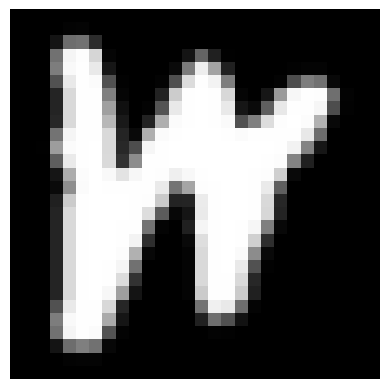

In [22]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 取第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
#因第一段輸出x_train資料集(60000, 28, 28)並沒有列出色彩維度，表示圖並非彩色，是灰階
#x_train資料集(60000, 28, 28)為三維資料要使用reshape()轉為二維
plt.imshow(X2.reshape(28,28), cmap='gray')#cmap='gray'顯示灰階圖

# 隱藏刻度
plt.axis('off')

# 顯示圖形
plt.show()

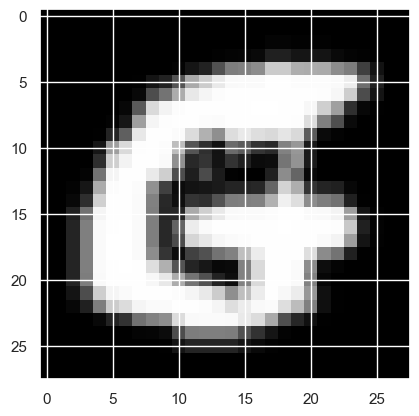

In [23]:
# 顯示第2張圖片圖像
import matplotlib.pyplot as plt

# 第二筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('on')

# 顯示圖形
plt.show()

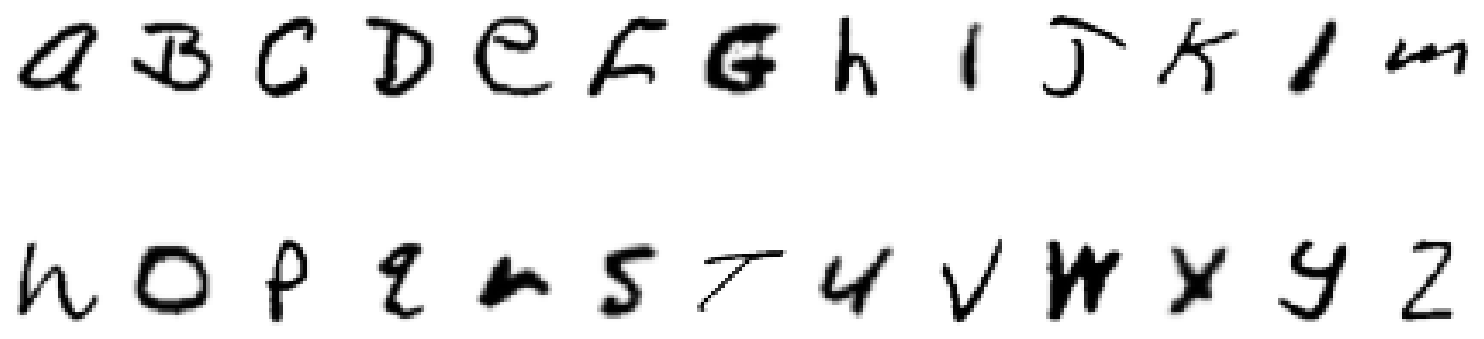

In [24]:
#方法1:將英文字母圖片輸出
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=13, sharex=True, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
for i in range(26):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

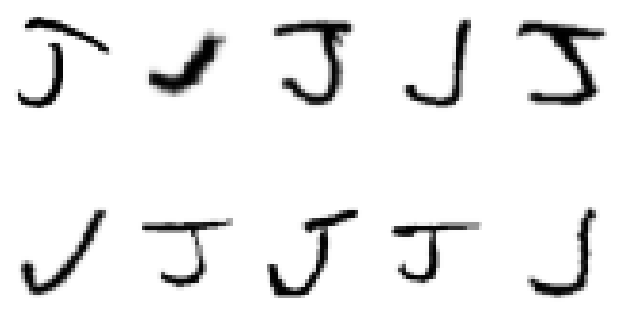

In [25]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

In [26]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]
#使用特徵縮放公式 = (x - min) / (max - min)....min=0,max=255
#所有值都會介於0-1之間

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#輸入層為28X28像素圖,並使用Flatten()函數將像素資料壓扁為一維度資料
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(26, activation='softmax')#輸出層為英文字母,共26個數
])

In [28]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',#設定要使用的優化器名稱(有多種優化器),使用'adam'可動態調整學習率
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2, batch_size=1000)

Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 1.7245 - accuracy: 0.5155 - val_loss: 1.0829 - val_accuracy: 0.6968
Epoch 2/10
100/100 [==============================] - 0s 5ms/step - loss: 1.0579 - accuracy: 0.6920 - val_loss: 0.8636 - val_accuracy: 0.7554
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 0.8834 - accuracy: 0.7427 - val_loss: 0.7411 - val_accuracy: 0.7886
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 0.7786 - accuracy: 0.7726 - val_loss: 0.6588 - val_accuracy: 0.8126
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 0.7050 - accuracy: 0.7925 - val_loss: 0.5995 - val_accuracy: 0.8297
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.6525 - accuracy: 0.8068 - val_loss: 0.5573 - val_accuracy: 0.8391
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 0.6137 - accuracy: 0.8170 - val_loss: 0.5244 - val_accuracy: 0.8477
Epoch 

In [30]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

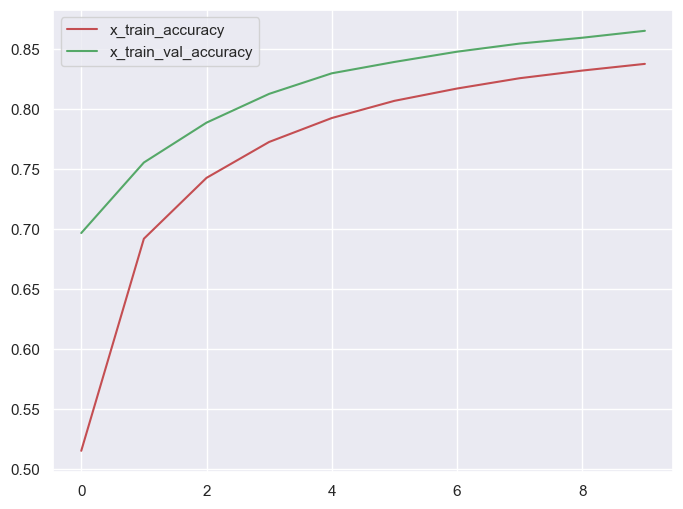

In [33]:
# 對訓練過程的準確率繪圖
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #使用google codelab無法跑中文
#plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='x_train_accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='x_train_val_accuracy')
plt.legend();
#要跑的出最後圖形呈現平穩且兩者接近收斂

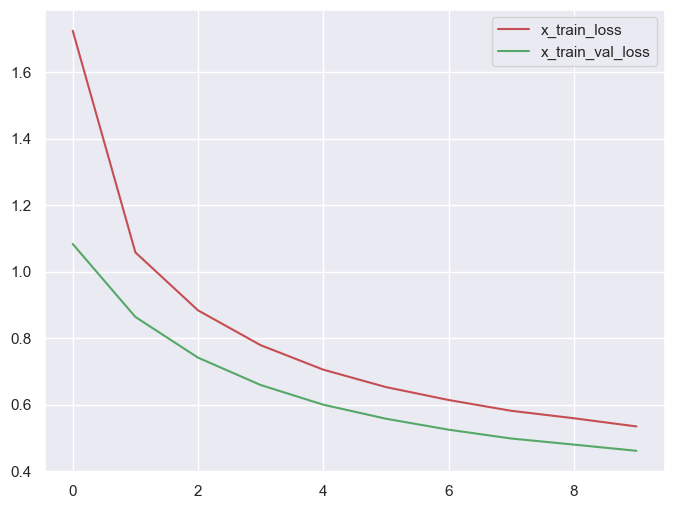

In [34]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='x_train_loss')
plt.plot(history.history['val_loss'], 'g', label='x_train_val_loss')
plt.legend();

In [35]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.4589
accuracy: 0.8631


In [36]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
#因有使用轉換，要加上class_names，才會是跑英文字母
print('actual    :', [class_names[i] for i in y_test[0:20]])
print('prediction:', [class_names[i] for i in predictions[0:20]])
#結果第一列為測試資料實際值
#第二列為使用模型下的預測值

650/650 [==============================] - 0s 384us/step
actual    : ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
prediction: ['A', 'A', 'A', 'Q', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'G', 'A', 'A', 'A', 'C', 'A', 'A', 'A']


In [37]:
# 顯示第 4 筆的機率
predictions = model.predict(x_test_norm[3:4], verbose=0)#使用predict()輸出數字0-9的預測機率值
print(f'A~Z預測機率: {np.around(predictions, 2)}')

A~Z預測機率: [[0.07 0.   0.   0.03 0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.
  0.02 0.   0.56 0.   0.   0.   0.28 0.   0.   0.   0.   0.  ]]


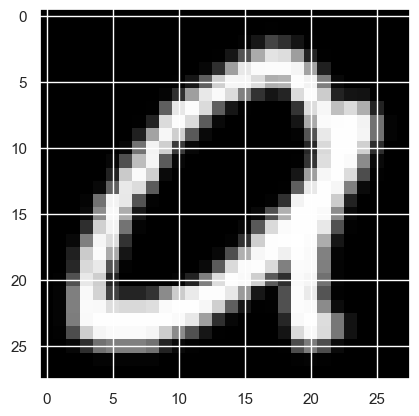

In [40]:
# 顯示第 4 筆圖像
X2 = x_test[3,:,:]#第4筆索引值為3
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('on')
plt.show()
#叫出的圖形確認極度無法辨別數字

In [41]:
# 模型存檔
model.save("letters_model.h5")

# 模型載入
model = tf.keras.models.load_model("letters_model.h5")
#目前所跑的資料都是內建資料集之歷史資料，無法辨別模型是否確實能使用
#故須自行繪製0-9之數字親身實驗一次